# Modelling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

import warnings
warnings.filterwarnings('ignore')  #Suppressing Warnings

# Setting the pandas to view all the avialble column
pd.set_option('display.max_columns',None)
%matplotlib inline

In [2]:
!wget qq https://raw.githubusercontent.com/amitkumar8636/Data_Science_Pathway/main/Projects/Focused_customer_Retention/dataset/processed_data.csv

--2022-02-13 13:14:55--  http://qq/
Resolving qq (qq)... failed: Name or service not known.
wget: unable to resolve host address ‘qq’
--2022-02-13 13:14:56--  https://raw.githubusercontent.com/amitkumar8636/Data_Science_Pathway/main/Projects/Focused_customer_Retention/dataset/processed_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 404542 (395K) [text/plain]
Saving to: ‘processed_data.csv’

processed_data.csv  100%[===================>] 395.06K  --.-KB/s    in 0.02s   

2022-02-13 13:14:56 (19.8 MB/s) - ‘processed_data.csv’ saved [404542/404542]

FINISHED --2022-02-13 13:14:56--
Total wall clock time: 0.6s
Downloaded: 1 files, 395K in 0.02s (19.8 MB/s)


In [3]:
data = pd.read_csv("processed_data.csv")
data

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1,29.85,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1
3,45,42.30,1840.75,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0
7039,72,103.20,7362.90,0,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0
7040,11,29.60,346.45,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
7041,4,74.40,306.60,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1


In [4]:
Y = data['Churn']
X = data.drop(columns=['Churn'],axis=1)

In [5]:
from sklearn.model_selection import train_test_split

## Without Standerdization

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=29)

In [7]:
# X_test.reset_index().to_csv("dataset/validation/x_test.csv",index=False)
# y_test.reset_index().to_csv("dataset/validation/y_test.csv",index=False)

# X_train.reset_index().to_csv("dataset/validation/x_train.csv",index=False)
# y_train.reset_index().to_csv("dataset/validation/y_train.csv",index=False)


# X_test_scaled.reset_index().to_csv("dataset/validation/x_test_scaled.csv",index=False)
# y_test_scaled.reset_index().to_csv("dataset/validation/y_test_scaled.csv",index=False)

# X_train_scaled.reset_index().to_csv("dataset/validation/x_train_scaled.csv",index=False)
# y_train_scaled.reset_index().to_csv("dataset/validation/y_train_scaled.csv",index=False)

## With Standerdized

### Standerdization

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [9]:
X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled = train_test_split(X_scaled,Y,test_size=0.2,shuffle=True,random_state=29)

## Algorothim Selection

List of Algorithm, We gonna test our data 
1. DecisionTree 
2. Logistic Regression
3. RandomForest
4. GradientBoosting
5. XGB Classifier
5. StackcingClassifier

## 1. DecisionTree Classifier

In [10]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=0)

In [11]:
# from sklearn.model_selection import GridSearchCV
# param_dist = {'criterion': ['gini','entropy'],'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250],'min_samples_leaf': [10,15,20,30,45] }
# tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3,verbose=1)
# tree_grid.fit(X_train,y_train) 
# print('Best Parameters using grid search: \n', tree_grid.best_params_)
# print("Best Score", tree_grid.best_score_)



In [12]:
# dtree = tree_grid.best_estimator_
dtree=DecisionTreeClassifier(
    criterion='entropy',
    random_state=0,
    max_depth=7,
    min_samples_split=50,
    min_samples_leaf=45)

dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=45,
                       min_samples_split=50, random_state=0)

### Plotting Tree

In [13]:
!pip install pydotplus

     |████████████████████████████████| 278 kB 890 kB/s            
  Preparing metadata (setup.py) ... - done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=49accb9ca1038d908a0a26cf874add4c4a0898a1a74e94bedb0a6d857dbc8af6
  Stored in directory: /root/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus


In [14]:
!pip install plotly

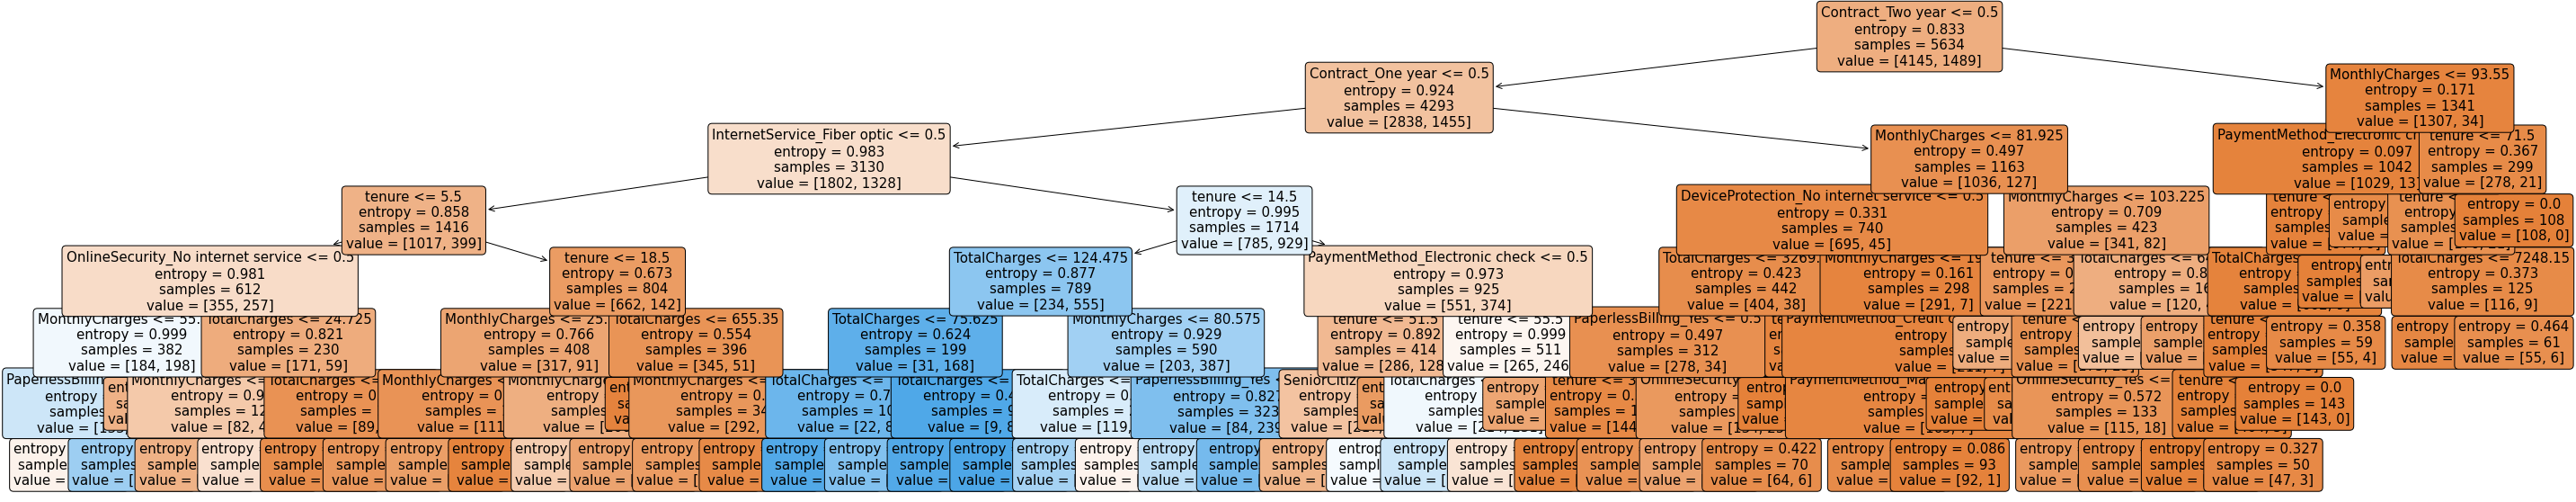

In [15]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
plt.figure(figsize=[50,10])
tree.plot_tree(dtree,filled=True,fontsize=15,rounded=True,feature_names=X.columns)
plt.show()

In [16]:
# pickle.dump(dtree, open('models/decision_tree.sav', 'wb'))

In [17]:
# loaded_model = pickle.load(open('models/decision_tree.sav', 'rb'))

## 2. Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression(random_state=0)
logreg.fit(X_train_scaled,y_train_scaled)

LogisticRegression(random_state=0)

In [19]:
coeff_df=pd.DataFrame(X.columns)
coeff_df.columns=['features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,tenure,-1.346851
1,MonthlyCharges,0.102212
2,TotalCharges,0.655080
3,SeniorCitizen,0.102577
4,Partner_Yes,-0.007944
5,Dependents_Yes,-0.061098
6,InternetService_Fiber optic,0.263210
7,InternetService_No,-0.057465
8,OnlineSecurity_No internet service,-0.057465
9,OnlineSecurity_Yes,-0.214381


## 3. RandomForest Classifier

In [20]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=0)
# rf.fit(X_train,y_train)

In [21]:
print("df")

df


In [22]:
# from sklearn.model_selection import GridSearchCV

# param_dist = {'bootstrap': [True], 'criterion': ['gini','entropy'],'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 250, 500],'min_samples_leaf': [10,15,30,45,60] }

# tree_grid = GridSearchCV(rf, cv = 5, param_grid=param_dist,n_jobs = 3,verbose=1)
# tree_grid.fit(X_train,y_train) 

# print('Best Parameters using grid search: \n', tree_grid.best_params_)
# print("Best Score", tree_grid.best_score_)

In [23]:
rf=RandomForestClassifier(
    bootstrap=True,
    criterion='entropy',
    random_state=0,
    max_depth=7,
    min_samples_split=100,
    min_samples_leaf=30)

rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=30,
                       min_samples_split=100, random_state=0)

In [24]:
def feature_importance(fitted_model=None,dataFrame=None,return_top_x=None,display=True,height=400):
    """
    Purpose
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on information gain for CART model.
    Parameters
    ----------
    * return_top_x(int): Array of Features till top X which are contributing more 
    * dataframe: Dataframe required to calculated columns : This dataframe only used for training
    * fitted_model: Trained Model required

    Returns
    ----------
    Return top X feature if parameter passed
    """
    import plotly.express as px
    
    if fitted_model is None or dataFrame is None:
        raise EOFError("Failed to Load model or Root DataFrame")
    ranking = pd.DataFrame(
        {
            'features':dataFrame.columns[:-1].to_list(),
            "importance":fitted_model.feature_importances_}).sort_values('importance',ascending=True).reset_index(drop=True)
    if display:
        fig = px.bar(ranking, y='features', x='importance', text='importance',orientation='h',title="Feature Importance Table",)
        fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
        fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide',height=height)
        fig.show()
    if return_top_x is not None and return_top_x <= len(ranking['features'].to_list()):
        return ranking['features'].to_list()[:return_top_x]

In [25]:
feature_importance(fitted_model=rf,dataFrame=data,height=800)

In [26]:
  import pandas as pd
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
tenure,0.205827
TotalCharges,0.134415
Contract_Two year,0.125342
InternetService_Fiber optic,0.108800
MonthlyCharges,0.063940
PaymentMethod_Electronic check,0.061146
OnlineSecurity_Yes,0.043577
Contract_One year,0.032326
TechSupport_No internet service,0.026974
TechSupport_Yes,0.024432


## 4. GradientBoostingTree

In [27]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0)


In [28]:
# from sklearn.model_selection import GridSearchCV

# # param_dist = {'learning_rate': [0.001, 0.01, 0.1], 'loss': ['deviance', 'exponential'],'max_depth': [3, 5, 6, 7,10,15], 'min_samples_split': [50, 100, 150, 200, 250, 500],'min_samples_leaf': [10,15,20,30,45,60] }
# param_dist = {'learning_rate': [ 0.1], 'loss': ['deviance'],'max_depth': [3, 5, 6, 7,10], 'min_samples_split': [50, 100, 150, 200, 250, 500],'min_samples_leaf': [20,30,45,60] }

# tree_grid = GridSearchCV(gbm, cv = 5, param_grid=param_dist,n_jobs = 3,verbose=1)
# tree_grid.fit(X_train,y_train) 

# print('Best Parameters using grid search: \n', tree_grid.best_params_)
# print("Best Score", tree_grid.best_score_)

In [29]:
gbm=GradientBoostingClassifier(
    criterion='mse',
    learning_rate=0.1,
    random_state=0,
    loss='deviance',
    max_depth=3,
    min_samples_split=250,
    min_samples_leaf=30)

gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', min_samples_leaf=30,
                           min_samples_split=250, random_state=0)

## 5.  XGB Classifier

In [30]:
import xgboost as xgb

xgb = xgb.XGBClassifier()

In [31]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     "max_depth": [3, 4, 5, 7],
#     "learning_rate": [0.1, 0.01],
#     "gamma": [0, 0.25, 1],
#     "reg_lambda": [0, 1, 10],
#     "scale_pos_weight": [1, 3, 5],
#     "subsample": [0.8],
#     "colsample_bytree": [0.5],
# }

# tree_grid = GridSearchCV(xgb, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")
# tree_grid.fit(X_train,y_train) 

# print('Best Parameters using grid search: \n', tree_grid.best_params_)
# print("Best Score", tree_grid.best_score_)

In [32]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(
    max_depth=3, 
    learning_rate=0.1,
    gamma=1,
    reg_lambda=10,
    scale_pos_weight=1,
    subsample=0.8,
    colsample_bytree=0.5)

xgb_clf.fit(X_train,y_train)

[13:15:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=10, scale_pos_weight=1,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

## 6. Stacking Classifier

In [33]:
base_learners = [
    ('rf', RandomForestClassifier(
    bootstrap=True,
    criterion='entropy',
    random_state=0,
    max_depth=7,
    min_samples_split=100,
    min_samples_leaf=30)),('gbm', GradientBoostingClassifier(
    criterion='mse',
    learning_rate=0.1,
    random_state=0,
    loss='deviance',
    max_depth=3,
    min_samples_split=250,
    min_samples_leaf=30)),('xgb_clf',xgb.XGBClassifier(
    max_depth=3, 
    learning_rate=0.1,
    gamma=1,
    reg_lambda=10,
    scale_pos_weight=1,
    subsample=0.8,
    colsample_bytree=0.5))  
                       ] 

In [34]:
from sklearn.ensemble import StackingClassifier
stack_clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

stack_clf.fit(X_train, y_train)

[13:15:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:15:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:15:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:15:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=7,
                                                       min_samples_leaf=30,
                                                       min_samples_split=100,
                                                       random_state=0)),
                               ('gbm',
                                GradientBoostingClassifier(criterion='mse',
                                                           min_samples_leaf=30,
                                                           min_samples_split=250,
                                                           random_state=0)),
                               ('xgb_clf',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              c

In [35]:
models = [dtree,logreg,rf,gbm,xgb_clf,stack_clf]

In [36]:
from sklearn import metrics
response = []
for model in models:
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test,y_pred)
    recall = metrics.recall_score(y_test,y_pred)
    f1_score = metrics.f1_score(y_test,y_pred)
    
    e = {'Model':str(model),'Y_test':y_test, 'Y_pred':y_pred, 'accuracy':accuracy, 'precision':precision,'recall':recall,'f1_score':f1_score }
    response.append(e)
    
result = pd.DataFrame(response)

In [37]:
result

,Model,Y_test,Y_pred,accuracy,precision,recall,f1_score
0,"DecisionTreeClassifier(criterion='entropy', ma...",6698 0 6068 1 1124 0 2235 0 7025 ...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.780696,0.618729,0.486842,0.544919
1,LogisticRegression(random_state=0),6698 0 6068 1 1124 0 2235 0 7025 ...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.269695,0.269695,1.000000,0.424818
2,"RandomForestClassifier(criterion='entropy', ma...",6698 0 6068 1 1124 0 2235 0 7025 ...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.782825,0.639098,0.447368,0.526316
3,"GradientBoostingClassifier(criterion='mse', mi...",6698 0 6068 1 1124 0 2235 0 7025 ...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.782115,0.617363,0.505263,0.555716
4,"XGBClassifier(base_score=0.5, booster='gbtree'...",6698 0 6068 1 1124 0 2235 0 7025 ...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.785664,0.632653,0.489474,0.551929
5,"StackingClassifier(estimators=[('rf',\n ...",6698 0 6068 1 1124 0 2235 0 7025 ...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.792761,0.651724,0.497368,0.564179


One more stacking one

In [38]:
import plotly.graph_objects as go
model_list = ['DecisionTree','LogisticReg','RandomForest','GradientBoosting','XGB','StackCLF']

fig = go.Figure(data=[
    go.Bar(name=result[item].name, x=model_list, y=result[item]) for item in result.columns[3:]
])
# Change the bar mode
fig.update_layout(barmode='group',title="Different Model Metric Comparison ",height=700)
fig.show()

In [39]:
!wget qq https://raw.githubusercontent.com/amitkumar8636/Data_Science_Pathway/main/Projects/Focused_customer_Retention/dataset/cleaned_data.csv

--2022-02-13 13:15:50--  http://qq/
Resolving qq (qq)... failed: Name or service not known.
wget: unable to resolve host address ‘qq’
--2022-02-13 13:15:51--  https://raw.githubusercontent.com/amitkumar8636/Data_Science_Pathway/main/Projects/Focused_customer_Retention/dataset/cleaned_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 963164 (941K) [text/plain]
Saving to: ‘cleaned_data.csv’

cleaned_data.csv    100%[===================>] 940.59K  --.-KB/s    in 0.03s   

2022-02-13 13:15:51 (26.6 MB/s) - ‘cleaned_data.csv’ saved [963164/963164]

FINISHED --2022-02-13 13:15:51--
Total wall clock time: 0.6s
Downloaded: 1 files, 941K in 0.03s (26.6 MB/s)


In [40]:
df = pd.read_csv("cleaned_data.csv")
df

,customerID,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,Churn
0,7590-VHVEG,1,29.85,29.85,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0,0
1,5575-GNVDE,34,56.95,1889.50,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0,0
2,3668-QPYBK,2,53.85,108.15,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0,1
3,7795-CFOCW,45,42.30,1840.75,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0,0
4,9237-HQITU,2,70.70,151.65,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,84.80,1990.50,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0,0
7039,2234-XADUH,72,103.20,7362.90,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0,0
7040,4801-JZAZL,11,29.60,346.45,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,0,0
7041,8361-LTMKD,4,74.40,306.60,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1,1


In [41]:
y_pred_prob = xgb_clf.predict_proba(X)[:, 1]
df['pred_prob_stacking']=pd.DataFrame(y_pred_prob)
df['P_Rank_stacking']=pd.qcut(df['pred_prob_stacking'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_stacking')['Churn'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_stacking')['pred_prob_stacking'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actutal_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_stacking',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_stacking,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.791489,0.756440,558.0,558.0,0.298555,0.298555,147.0,147.0,0.028411,0.028411,0.2701,0.100099,0.100099,1
1,9,704,0.603693,0.588986,425.0,983.0,0.227394,0.525950,279.0,426.0,0.053923,0.082335,0.4436,0.099957,0.200057,2
2,8,704,0.454545,0.445481,320.0,1303.0,0.171215,0.697164,384.0,810.0,0.074217,0.156552,0.5406,0.099957,0.300014,3
3,7,704,0.303977,0.315644,214.0,1517.0,0.114500,0.811664,490.0,1300.0,0.094704,0.251256,0.5604,0.099957,0.399972,4
4,6,704,0.214489,0.217512,151.0,1668.0,0.080792,0.892456,553.0,1853.0,0.106881,0.358137,0.5343,0.099957,0.499929,5
5,5,705,0.126241,0.134331,89.0,1757.0,0.047619,0.940075,616.0,2469.0,0.119057,0.477194,0.4629,0.100099,0.600028,6
6,4,704,0.100852,0.081249,71.0,1828.0,0.037988,0.978063,633.0,3102.0,0.122342,0.599536,0.3785,0.099957,0.699986,7
7,3,704,0.036932,0.046644,26.0,1854.0,0.013911,0.991974,678.0,3780.0,0.131040,0.730576,0.2614,0.099957,0.799943,8
8,2,704,0.015625,0.022546,11.0,1865.0,0.005886,0.997860,693.0,4473.0,0.133939,0.864515,0.1333,0.099957,0.899901,9
9,1,705,0.005674,0.012295,4.0,1869.0,0.002140,1.000000,701.0,5174.0,0.135485,1.000000,0.0000,0.100099,1.000000,10


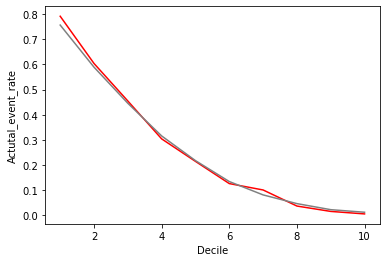

In [42]:
ax = sns.lineplot( x="Decile", y="Actutal_event_rate", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="Predicted_event_rate", data=sorted_reindexed,color='grey')

In [43]:
df['Tenure_Rank']=pd.qcut(df['tenure'].rank(method='first').values,10,duplicates='drop').codes+1

In [44]:
df['Tenure_Segment']=np.where(df['Tenure_Rank']<=6,"Low Tenure","High Tenure")

In [45]:
df['MonthlyCharges_Rank']=pd.qcut(df['MonthlyCharges'].rank(method='first').values,10,duplicates='drop').codes+1

In [46]:
# df.groupby('MonthlyCharges_Rank')['MonthlyCharges'].agg(['min','max','mean'])

In [47]:
df['Monthly_Charge_Segment']=np.where(df['MonthlyCharges_Rank']<=5,"Low Charges","High Charges")

In [48]:
y_pred_prob = xgb_clf.predict_proba(X)[:, 1]
df['pred_prob_xgb']=pd.DataFrame(y_pred_prob)
df['P_Rank_XGB']=pd.qcut(df['pred_prob_xgb'].rank(method='first').values,10,duplicates='drop').codes+1

In [49]:
df['Predicted_Churn_Rank']=np.where(df['P_Rank_XGB']>=8,"Top 3","Bottom 7")

In [50]:
df

,customerID,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,Churn,pred_prob_stacking,P_Rank_stacking,Tenure_Rank,Tenure_Segment,MonthlyCharges_Rank,Monthly_Charge_Segment,pred_prob_xgb,P_Rank_XGB,Predicted_Churn_Rank
0,7590-VHVEG,1,29.85,29.85,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0,0,0.704413,10,1,Low Tenure,3,Low Charges,0.704413,10,Top 3
1,5575-GNVDE,34,56.95,1889.50,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0,0,0.048963,3,6,Low Tenure,4,Low Charges,0.048963,3,Bottom 7
2,3668-QPYBK,2,53.85,108.15,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0,1,0.383554,8,1,Low Tenure,4,Low Charges,0.383554,8,Top 3
3,7795-CFOCW,45,42.30,1840.75,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0,0,0.067109,4,7,High Tenure,3,Low Charges,0.067109,4,Bottom 7
4,9237-HQITU,2,70.70,151.65,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0,1,0.725899,10,1,Low Tenure,6,High Charges,0.725899,10,Top 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,84.80,1990.50,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0,0,0.064308,4,5,Low Tenure,7,High Charges,0.064308,4,Bottom 7
7039,2234-XADUH,72,103.20,7362.90,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0,0,0.074461,4,10,High Tenure,10,High Charges,0.074461,4,Bottom 7
7040,4801-JZAZL,11,29.60,346.45,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,0,0,0.259103,6,3,Low Tenure,3,Low Charges,0.259103,6,Bottom 7
7041,8361-LTMKD,4,74.40,306.60,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1,1,0.651766,9,2,Low Tenure,6,High Charges,0.651766,9,Top 3


In [51]:
df_top3=df.loc[df['Predicted_Churn_Rank']=='Top 3',:]

In [52]:
service_list=['customerID','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'
              ,'StreamingTV','StreamingMovies','Contract','PaperlessBilling']
target=['target']

total=service_list+target

In [53]:
df_top3_services=df_top3[service_list]

In [54]:
df_top3_services

,customerID,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling
0,7590-VHVEG,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes
2,3668-QPYBK,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes
4,9237-HQITU,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes
5,9305-CDSKC,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes
8,7892-POOKP,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes
7029,2235-DWLJU,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes
7032,6894-LFHLY,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes
7035,8456-QDAVC,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes


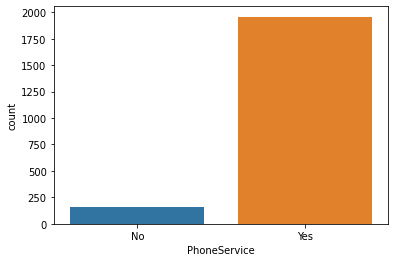

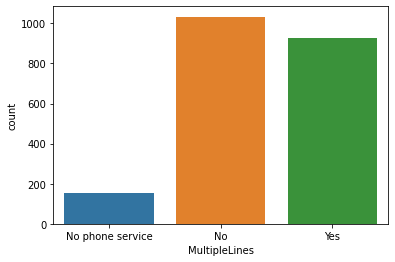

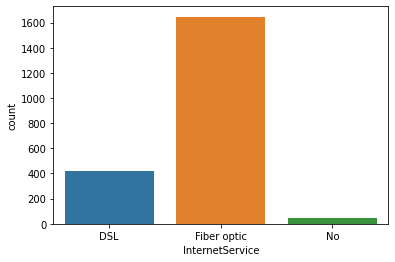

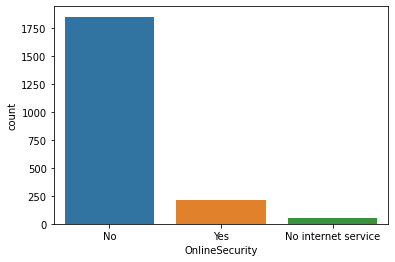

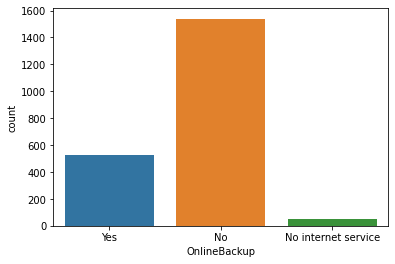

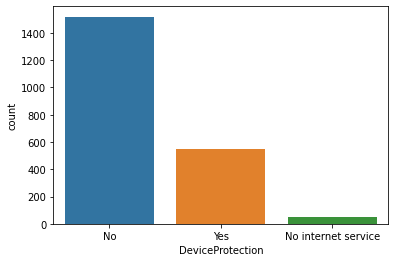

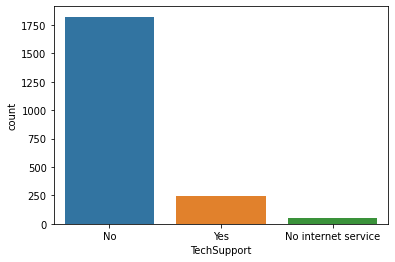

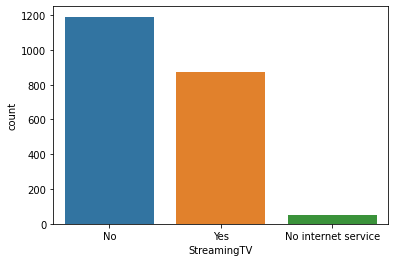

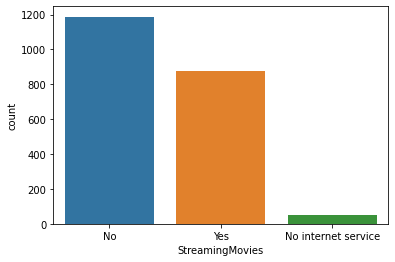

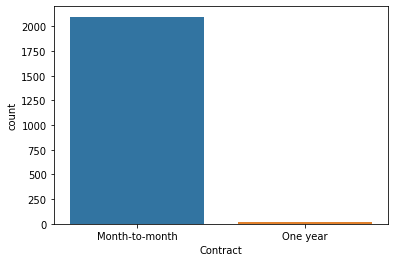

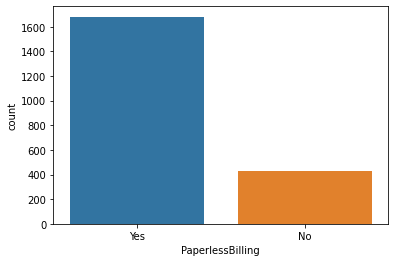

In [55]:
for col in (df_top3_services.columns.to_list()[1:]):
    plt.figure()
    sns.countplot(x=col,data=df_top3_services)
plt.show()

## Recommendations
1. Device Protection with Online Services
2.  Convert customer to DSL if they are facing challenges with Fiber Optics
3.  Offer discounts on Yearly contracts

In [56]:
(df[df.Contract=='One year']).sort_values(['MonthlyCharges_Rank'],ascending=False)

,customerID,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,Churn,pred_prob_stacking,P_Rank_stacking,Tenure_Rank,Tenure_Segment,MonthlyCharges_Rank,Monthly_Charge_Segment,pred_prob_xgb,P_Rank_XGB,Predicted_Churn_Rank
7039,2234-XADUH,72,103.20,7362.90,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0,0,0.074461,4,10,High Tenure,10,High Charges,0.074461,4,Bottom 7
2451,3325-FUYCG,28,106.10,2847.40,Male,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,Yes,One year,No,Electronic check,0,1,0.353039,7,5,Low Tenure,10,High Charges,0.353039,7,Bottom 7
3046,8715-KKTFG,61,103.30,6518.35,Female,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),0,0,0.211111,6,9,High Tenure,10,High Charges,0.211111,6,Bottom 7
3038,5897-ZYEKH,67,105.60,7112.15,Female,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,Yes,One year,Yes,Electronic check,1,0,0.280411,7,9,High Tenure,10,High Charges,0.280411,7,Bottom 7
5414,2722-VOJQL,64,105.65,6903.10,Male,No,No,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,Yes,Credit card (automatic),0,1,0.198816,6,9,High Tenure,10,High Charges,0.198816,6,Bottom 7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,7560-QRBXH,48,19.95,936.70,Female,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0,0,0.032335,3,7,High Tenure,1,Low Charges,0.032335,3,Bottom 7
3267,8902-ZEOVF,47,20.05,951.55,Male,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0,0,0.031651,3,7,High Tenure,1,Low Charges,0.031651,3,Bottom 7
1399,3131-NWVFJ,14,19.55,294.50,Female,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0,0,0.044638,3,4,Low Tenure,1,Low Charges,0.044638,3,Bottom 7
3277,4323-ELYYB,13,20.00,218.55,Male,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0,0,0.046207,3,4,Low Tenure,1,Low Charges,0.046207,3,Bottom 7
